### Process_data_agent_scores.ipynb

This notebook runs through each agent in a file, and finds the decision that is most ideal for that agent and saves this to a file

In [1]:
import pandas as pd

filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/processed_data_ess.csv"
savename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/processed_data_ess_with_decisions.csv"

In [2]:
# Compute decision
df = pd.read_csv(filename)
for index, row in df.iterrows():
    df.at[index, 'rel-nonrel'] = row['rel'] / (row['rel'] + row['nonrel'])
    df.at[index, 'nonrel-rel'] = row['nonrel'] / (row['rel'] + row['nonrel'])
    df.at[index, 'decision'] = (df.at[index, 'rel-nonrel'] * row['a_div_rel']) + (df.at[index, 'nonrel-rel'] * row['a_div_nonrel'])

#df.to_csv(savename)
df

,Unnamed: 0,country,rel,nonrel,a_adp_rel,a_adp_nonrel,a_div_rel,a_div_nonrel,rel-nonrel,nonrel-rel,decision
0,0,AT,642,1216,0.0,0.0,0.047767,0.112390,0.345533,0.654467,0.090061
1,1,BE,621,1116,0.0,0.0,-0.063875,-0.054361,0.357513,0.642487,-0.057762
2,2,CH,767,666,0.0,0.0,0.150804,0.262262,0.535241,0.464759,0.202605
3,3,CZ,577,1483,0.0,0.0,0.021375,0.028995,0.280097,0.719903,0.026861
4,4,DE,1264,1488,0.0,0.0,0.002110,0.068100,0.459302,0.540698,0.037791
5,5,EE,802,1118,0.0,0.0,0.072319,0.049493,0.417708,0.582292,0.059028
6,6,ES,567,1143,0.0,0.0,0.014697,0.056285,0.331579,0.668421,0.042495
7,7,FI,739,1099,0.0,0.0,-0.098782,-0.005763,0.402067,0.597933,-0.043163
8,8,FR,1063,899,0.0,0.0,0.021010,0.112347,0.541794,0.458206,0.062861
9,9,GB,541,1287,0.0,0.0,0.008010,0.050505,0.295952,0.704048,0.037929


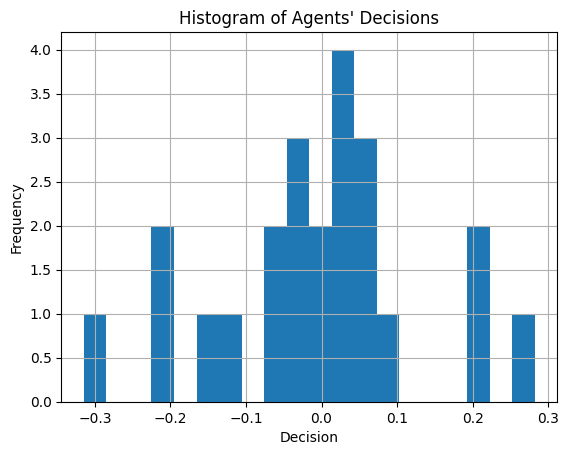

In [3]:
import matplotlib.pyplot as plt

df['decision'].hist(bins=20)
plt.xlabel('Decision')
plt.ylabel('Frequency')
plt.title('Histogram of Agents\' Decisions')
plt.show()

#### Grab consensus value system and store decisions for each relevant consensus

In [4]:
#relevent_consensuses =  [1.0, 1.1, 1.5, 4.0, 2.0, 10.0]
relevent_consensuses = [round(x * 0.1, 1) for x in range(10, 101)]
relevent_columns = ['p','Rel-Nonrel', 'Nonrel-Rel', 'Rel_div_p', 'Nonrel_div_p']


#preference_filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/results/31-10-results-preference.csv"
#actions_filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/results/31-10-results-actions.csv"

actions_filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/31-10-results-action.csv"
preference_filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/31-10-results-preference.csv"

final_df_savename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/30-10-ess-relevant-consensus.csv"

pref_df = pd.read_csv(preference_filename)
act_df = pd.read_csv(actions_filename)
cons_df = pd.merge(pref_df, act_df, on='p')
cons_df['p'] = cons_df['p'].round(1)
pref_df


,p,Up,Dist1,Distl,Rel-Rel,Rel-Nonrel,Nonrel-Rel,Nonrel-Nonrel
0,1.0,4.314975,0.000000,0.027054,0.0,0.351466,0.648534,0.0
1,1.1,3.152382,0.000000,0.050804,0.0,0.351466,0.648534,0.0
2,1.2,2.435088,0.000000,0.048205,0.0,0.351466,0.648534,0.0
3,1.3,1.962955,0.000000,0.046110,0.0,0.351466,0.648534,0.0
4,1.4,1.635956,0.000000,0.044387,0.0,0.351466,0.648534,0.0
...,...,...,...,...,...,...,...,...
87,9.7,0.310001,0.021654,0.007404,0.0,0.371627,0.628373,0.0
88,9.8,0.309425,0.021735,0.007302,0.0,0.371717,0.628283,0.0
89,9.9,0.308863,0.021814,0.007202,0.0,0.371806,0.628194,0.0
90,10.0,0.308313,0.021893,0.007103,0.0,0.371893,0.628107,0.0


In [5]:
final_df = pd.DataFrame()
for consensus in relevent_consensuses:
    filtered_df = cons_df[cons_df['p'] == consensus][relevent_columns]
    filtered_df['decision'] = (filtered_df['Rel_div_p'] * filtered_df['Rel-Nonrel']) + (filtered_df['Nonrel_div_p'] * filtered_df['Nonrel-Rel'])
    final_df = pd.concat([final_df, filtered_df], ignore_index=True)
final_df.to_csv(final_df_savename)
final_df

,p,Rel-Nonrel,Nonrel-Rel,Rel_div_p,Nonrel_div_p,decision
0,1.0,0.351466,0.648534,-0.027939,0.013171,-0.001278
1,1.1,0.351466,0.648534,-0.027939,0.013171,-0.001278
2,1.2,0.351466,0.648534,-0.027939,0.013171,-0.001278
3,1.3,0.351466,0.648534,-0.027939,0.013171,-0.001278
4,1.4,0.351466,0.648534,-0.027939,0.013171,-0.001278
...,...,...,...,...,...,...
86,9.6,0.371536,0.628464,-0.051963,0.010705,-0.012578
87,9.7,0.371627,0.628373,-0.052050,0.010659,-0.012646
88,9.8,0.371717,0.628283,-0.052134,0.010613,-0.012711
89,9.9,0.371806,0.628194,-0.052216,0.010568,-0.012775


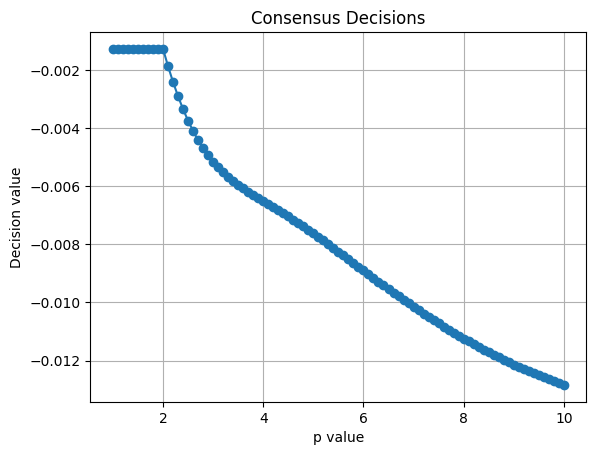

In [6]:
import matplotlib.pyplot as plt

plt.plot(final_df['p'], final_df['decision'], marker='o')
plt.xlabel('p value')
plt.ylabel('Decision value')
plt.title('Consensus Decisions')
plt.grid(True)
plt.show()

#### Find the difference between each agent and each of the 4 different strategies (only on decision)

For every agent that has a value system that we have just generated, we now compare the agents decision against the different decisions found by each strategy.

In [7]:
agent_df = df
strategy_df = final_df
agent_df['min_distance'] = agent_df.apply(
    lambda row: min(abs(row['decision'] - strategy_decision) for strategy_decision in strategy_df['decision']),
    axis=1
)

agent_df['closest_p'] = agent_df.apply(
    lambda row: strategy_df.loc[(strategy_df['decision'] - row['decision']).abs().idxmin(), 'p'],
    axis=1
)

agent_df

print(agent_df['closest_p'].value_counts())



closest_p
1.0     12
10.0    10
9.0      1
Name: count, dtype: int64
